<h2 style="color:blue" align="center">Handwritten digits classification using KNN & CNN</h2>

In [ ]:
#pip install tensorflow

In [20]:
# Import python necessary library
from tensorflow import keras
from tensorflow.keras import datasets
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [21]:
# This is a dataset of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images.
# More info can be found at the MNIST homepage
# X_train: uint8 NumPy array of grayscale image data with shapes (60000, 28, 28), containing the training data.
#    Pixel values range from 0 to 255.
# y_train: uint8 NumPy array of digit labels (integers in range 0-9) with shape (60000,) for the training data.
# X_test: uint8 NumPy array of grayscale image data with shapes (10000, 28, 28), containing the test data.
#    Pixel values range from 0 to 255.
# y_test: uint8 NumPy array of digit labels (integers in range 0-9) with shape (10000,) for the test data.
(X_train, y_train) , (X_test, y_test) = datasets.mnist.load_data()

In [22]:
# showing length for X_train
len(X_train)

60000

In [23]:
# showing the sahpe of X_train
X_train.shape

(60000, 28, 28)

In [24]:
# showing the length of X_test
len(X_test)

10000

In [25]:
# showing the type of X_train
type(X_train)

numpy.ndarray

In [26]:
# showing the shape of X_train for index 0. Which caontain 28*28 pixel one image
X_train[0].shape

(28, 28)

In [27]:
# showing the data of X_train image for index 0, which contains 0-255 values
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

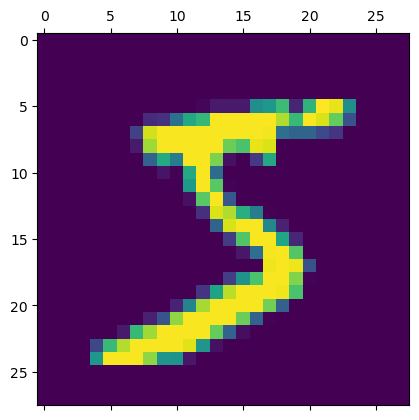

In [28]:
# Preview the X_train image for index 0 using matplotlib python library.
plt.matshow(X_train[0])

In [29]:
y_train[40]

1

In [30]:
# To perform Machine Learning, it is important to convert all the values 
# from 0 to 255 for every pixel to a range of values from 0 to 1. The simplest way is to divide
# the value of every pixel by 255 to get the values in the range of 0 to 1
X_train = X_train / 255
X_test = X_test / 255

In [31]:
# desplaying the value of X_train(only for index 0) after devide by 255.
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

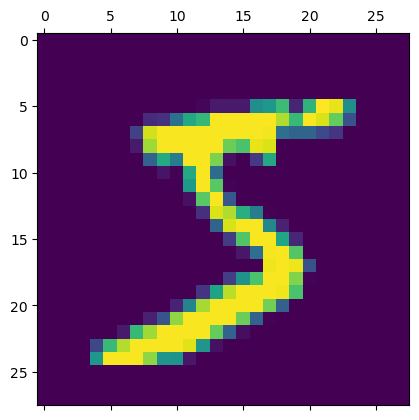

In [32]:
# Priview the modified X_train image for index 0 using matplotlib python library.
plt.matshow(X_train[0])

In [33]:
# Flattening the X_tarin data X_test data
X_train_flattened = X_train.reshape(len(X_train), 28*28)   #60000, 784
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [53]:
# Disaplay the shep of X_train_flattened after flattening
X_train_flattened.shape

(60000, 784)

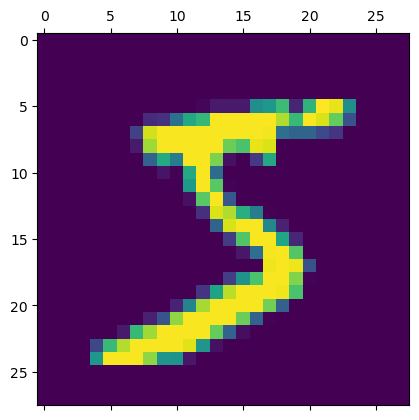

In [34]:
# Preview the image of X_train_flattened for index 0 after flattening.
plt.matshow(X_train_flattened[0].reshape(28,28))

In [35]:
# Print the value of X_train_flattened
X_train_flattened

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [55]:
# import python libraray for knn
from sklearn.neighbors import KNeighborsClassifier

# Calling KNN classifier
knn = KNeighborsClassifier(n_neighbors=3) 

# Fit the k-nearest neighbors classifier from the training dataset.
knn.fit(X_train_flattened, y_train)

KNeighborsClassifier(n_neighbors=3)

In [37]:
# showing score
knn.score(X_test_flattened, y_test)

0.9705

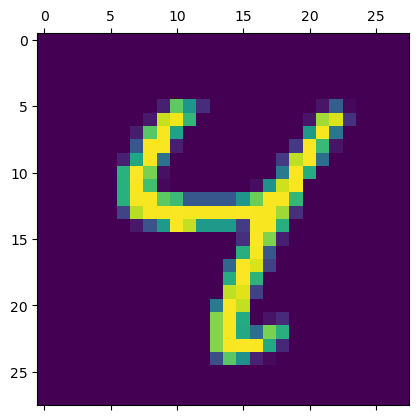

In [38]:
# Preview the image  of X_test for index 0.
plt.matshow(X_test[6])

In [39]:
# Preview the image  of X_test_flattened for index 6.
X_test_flattened[6]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [40]:
# Preview the value of X_test_flattened for index 6.
X_test_flattened[6]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [73]:
# import pandas library 
import pandas as pd

# load panadas dataframe on test image from X_test_flattened
df = pd.DataFrame(X_test_flattened[6])

# transpose it to single row
df = df.T

In [71]:
# Predict the class labels for the provided data and print the pridected label value
prediction = knn.predict(df) [0]
print(f"Predicted: {prediction}")

Predicted: 4


In [82]:
# Now i will try to predict digit from inputed image  
# Import Opencv python libarray for image reading
import cv2

### Preprocess step for  hard disk image

In [47]:
# Reading image from hard disk using open cv
modified_image = cv2.imread('modified.PNG', cv2.IMREAD_GRAYSCALE)

# Displaying raw image data
modified_image

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

### For Web camera image

In [1]:
# Capturing gary iamge from wbe cam using web cam and auto save it on hard disk.
# For capturing the image please press space key.
# For quit captuing please press the esc key on keyboard.
cam = cv2.VideoCapture(0)
cv2.namedWindow("Digit recognize")
img_counter = 0
while True:
    ret, frame = cam.read()
    
    img_raw = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    img =cv2.resize(img_raw, (386, 387))
    if not ret:
        print("failed to grab frame")
        break
    cv2.imshow("test", img)

    k = cv2.waitKey(1)
    if k%256 == 27:
        # ESC pressed
        print("Escape hit, closing...")
        break
    elif k%256 == 32:
        # SPACE pressed
        img_name = "opencv_frame.png"
        cv2.imwrite(img_name, img)
        print("{} written!".format(img_name))
        img_counter += 1

cam.release()
cv2.destroyAllWindows()

opencv_frame.png written!
Escape hit, closing...


In [56]:
# Redaing image after captured image from hard disk
img2 = cv2.imread('opencv_frame.png')
img2gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)

# Thresholding is the binarization of an image. In general, we seek to convert a grayscale image to a binary image
ret, modified_image = cv2.threshold(img2gray, 120, 255, cv2.THRESH_BINARY)

In [57]:
# Showing image dimension.
modified_image.shape

(387, 386)

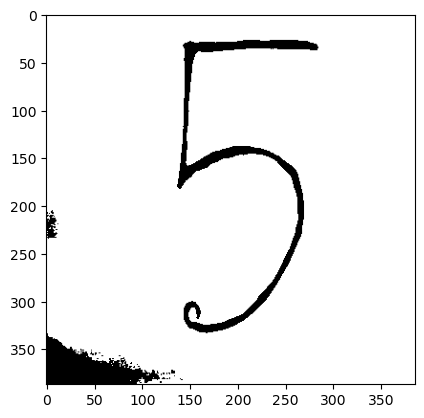

In [4]:
# Preview the gary sacle image
plt.imshow(modified_image, cmap='gray')

In [58]:
# Take only region of digit from loaded image.
img_resizedM = cv2.bitwise_not(modified_image)
img_resizedM

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0]], dtype=uint8)

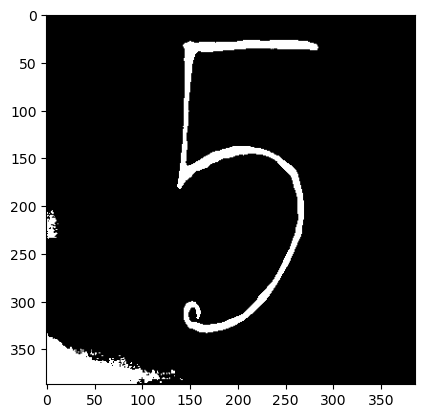

In [6]:
# After bitwise_not operation priviewing the image.
plt.imshow(img_resizedM, cmap='gray')

In [7]:
# Resized the garyed image 28*28 and dsiplay the value
img_resizedM = cv2.resize(img_resizedM, (28, 28), interpolation=cv2.INTER_LINEAR)
img_resizedM

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  64,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  64,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [8]:
# Print the shape of iamge
img_resizedM.shape

(28, 28)

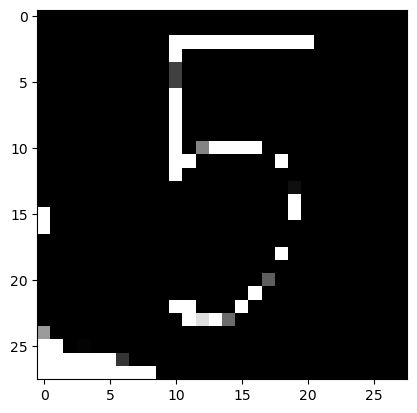

In [9]:
# Preview the reshaped image
plt.imshow(img_resizedM, cmap='gray')

In [274]:
# To perform Machine Learning, it is important to convert all the values 
# from 0 to 255 for every pixel to a range of values from 0 to 1. The simplest way is to divide
# the value of every pixel by 255 to get the values in the range of 0 to 1
img_resizedM=img_resizedM/255
img_resizedM

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.1372549 , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [275]:
# Flattening the X_tarin data X_test data
img_resizedM_Flat = img_resizedM.reshape(1, 28*28)
img_resizedM_Flat

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.1372549 , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

### Digit ditection using knn

In [161]:
# Load iamage data on panadas library
df = pd.DataFrame(img_resizedM_Flat)
df

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [162]:
# Predict the class labels for the provided data and print the pridected label value.
knn.predict(df)

array([7], dtype=uint8)

In [ ]:
# Exaport genearted model 
import joblib as jbl
jbl.dump(knn,'KNNModel_Job')

### Digit ditection using CNN

In [18]:
# Import the python library for CNN
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np

In [12]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [ ]:
# making model fro CNN prediction
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D((2,
 
2)),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [ ]:
# Compile and fit the data to the model.
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(x_train, y_train, epochs=5)

In [15]:
# Display the accuracy of model
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {accuracy * 100:.2f}%")

313/313 [==============================] - 1s 2ms/step - loss: 0.0368 - accuracy: 0.9902
Test accuracy: 99.02%


In [16]:
# Predict the class labels for the provided data and print the pridected label value.
prediction = model.predict(img_resizedM.reshape(1, 28, 28, 1))
print(f"Predicted: {np.argmax(prediction)}")

1/1 [==============================] - 0s 88ms/step
Predicted: 5
